In [53]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# This relates to plotting datetime values with matplotlib:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [54]:
df = pd.read_csv('original//PYTORCH_NOTEBOOKS//Data/TimeSeriesData/Alcohol_Sales.csv',index_col=0,parse_dates=True)

In [55]:
df.describe()

,S4248SM144NCEN
count,325.000000
mean,7886.400000
std,2914.269061
min,3031.000000
25%,5231.000000
50%,7481.000000
75%,9977.000000
max,15504.000000


In [7]:
df = df.dropna()

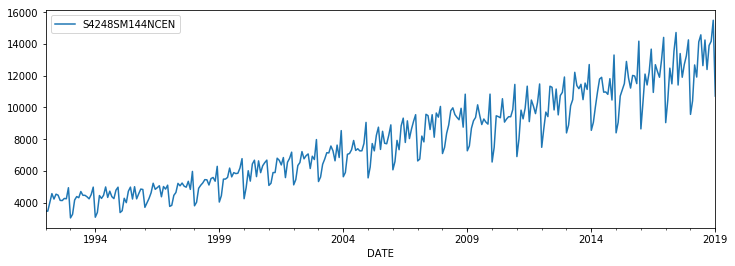

In [9]:
df.plot(figsize=(12,4));

In [56]:
y = df['S4248SM144NCEN'].values.astype(float)

In [57]:
y

array([ 3459.,  3458.,  4002.,  4564.,  4221.,  4529.,  4466.,  4137.,
        4126.,  4259.,  4240.,  4936.,  3031.,  3261.,  4160.,  4377.,
        4307.,  4696.,  4458.,  4457.,  4364.,  4236.,  4500.,  4974.,
        3075.,  3377.,  4443.,  4261.,  4460.,  4985.,  4324.,  4719.,
        4374.,  4248.,  4784.,  4971.,  3370.,  3484.,  4269.,  3994.,
        4715.,  4974.,  4223.,  5000.,  4235.,  4554.,  4851.,  4826.,
        3699.,  3983.,  4262.,  4619.,  5219.,  4836.,  4941.,  5062.,
        4365.,  5012.,  4850.,  5097.,  3758.,  3825.,  4454.,  4635.,
        5210.,  5057.,  5231.,  5034.,  4970.,  5342.,  4831.,  5965.,
        3796.,  4019.,  4898.,  5090.,  5237.,  5447.,  5435.,  5107.,
        5515.,  5583.,  5346.,  6286.,  4032.,  4435.,  5479.,  5483.,
        5587.,  6176.,  5621.,  5889.,  5828.,  5849.,  6180.,  6771.,
        4243.,  4952.,  6008.,  5353.,  6435.,  6673.,  5636.,  6630.,
        5887.,  6322.,  6520.,  6678.,  5082.,  5216.,  5893.,  5894.,
      

In [58]:
test_size = 12

In [59]:
train_set = y[:-test_size]
test_set = y[-test_size:]

In [60]:
test_set

array([10415., 12683., 11919., 14138., 14583., 12640., 14257., 12396.,
       13914., 14174., 15504., 10718.])

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler = MinMaxScaler(feature_range=(-1,1))

In [63]:
scaler.fit(train_set.reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(-1, 1))

In [64]:
train_norm = scaler.transform(train_set.reshape(-1,1))

In [65]:
train_norm = torch.FloatTensor(train_norm).view(-1)

In [66]:
window_size = 12

def input_data(seq,ws):
    
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        
        out.append((window,label))
        
    return out

In [67]:
train_data = input_data(train_norm,window_size)

In [30]:
train_data

[(tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
          -0.8128, -0.7901, -0.7933, -0.6743]),
  tensor([-1.])),
 (tensor([-0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109, -0.8128,
          -0.7901, -0.7933, -0.6743, -1.0000]),
  tensor([-0.9607])),
 (tensor([-0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109, -0.8128, -0.7901,
          -0.7933, -0.6743, -1.0000, -0.9607]),
  tensor([-0.8070])),
 (tensor([-0.7379, -0.7966, -0.7439, -0.7547, -0.8109, -0.8128, -0.7901, -0.7933,
          -0.6743, -1.0000, -0.9607, -0.8070]),
  tensor([-0.7699])),
 (tensor([-0.7966, -0.7439, -0.7547, -0.8109, -0.8128, -0.7901, -0.7933, -0.6743,
          -1.0000, -0.9607, -0.8070, -0.7699]),
  tensor([-0.7819])),
 (tensor([-0.7439, -0.7547, -0.8109, -0.8128, -0.7901, -0.7933, -0.6743, -1.0000,
          -0.9607, -0.8070, -0.7699, -0.7819]),
  tensor([-0.7154])),
 (tensor([-0.7547, -0.8109, -0.8128, -0.7901, -0.7933, -0.6743, -1.0000, -0.9607,
          

In [68]:
class LSTMnetwork(nn.Module):
    def __init__(self,input_size=1,hidden_size=100,output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        # Add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        # Add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,output_size)
        
        # Initialize h0 and c0:
        self.hidden = (torch.zeros(1,1,self.hidden_size),
                       torch.zeros(1,1,self.hidden_size))

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]  # we only want the last value

In [73]:
for seq,y_train in train_data:
    break

[(tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
          -0.8128, -0.7901, -0.7933, -0.6743]),
  tensor([-1.])),
 (tensor([-0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109, -0.8128,
          -0.7901, -0.7933, -0.6743, -1.0000]),
  tensor([-0.9607])),
 (tensor([-0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109, -0.8128, -0.7901,
          -0.7933, -0.6743, -1.0000, -0.9607]),
  tensor([-0.8070])),
 (tensor([-0.7379, -0.7966, -0.7439, -0.7547, -0.8109, -0.8128, -0.7901, -0.7933,
          -0.6743, -1.0000, -0.9607, -0.8070]),
  tensor([-0.7699])),
 (tensor([-0.7966, -0.7439, -0.7547, -0.8109, -0.8128, -0.7901, -0.7933, -0.6743,
          -1.0000, -0.9607, -0.8070, -0.7699]),
  tensor([-0.7819])),
 (tensor([-0.7439, -0.7547, -0.8109, -0.8128, -0.7901, -0.7933, -0.6743, -1.0000,
          -0.9607, -0.8070, -0.7699, -0.7819]),
  tensor([-0.7154])),
 (tensor([-0.7547, -0.8109, -0.8128, -0.7901, -0.7933, -0.6743, -1.0000, -0.9607,
          

In [69]:
model = LSTMnetwork()

In [70]:
model

LSTMnetwork(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [71]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [72]:
epochs = 100

import time

start_time = time.time()

for epoch in range(epochs):
    
    for seq,y_train in train_data:
        
        optimizer.zero_grad()
        
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                       torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred,y_train)
        loss.backward()
        optimizer.step()
        
    print(f'Epoch : {epoch}   Loss: {loss.item()}')



duration = time.time() - start_time
print(f'Duration: {duration/60} in minutes')

Epoch : 0   Loss: 0.34719598293304443
Epoch : 1   Loss: 0.3262496292591095


KeyboardInterrupt: 

In [37]:
future = 12

pred = train_norm[-window_size:].tolist()

model.eval()

for i in range(future):
    
    seq = torch.FloatTensor(pred[-window_size:])
    
    with torch.no_grad():
        
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                       torch.zeros(1,1,model.hidden_size))
        
        pred.append(model(seq).item())
    

In [46]:
true_predictions = scaler.inverse_transform(np.array(pred[window_size:]).reshape(-1,1))

In [41]:
df['S4248SM144NCEN'][-12:]

DATE
2018-02-01    10415
2018-03-01    12683
2018-04-01    11919
2018-05-01    14138
2018-06-01    14583
2018-07-01    12640
2018-08-01    14257
2018-09-01    12396
2018-10-01    13914
2018-11-01    14174
2018-12-01    15504
2019-01-01    10718
Name: S4248SM144NCEN, dtype: int64

In [42]:
x = np.arange('2018-02-01','2019-02-01',dtype='datetime64[M]')

In [43]:
x

array(['2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
       '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01'],
      dtype='datetime64[M]')

In [44]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

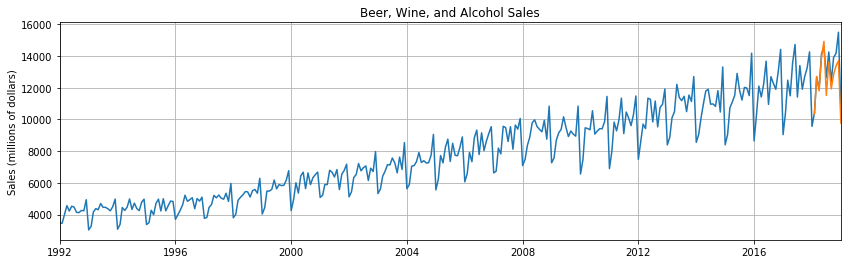

In [48]:
plt.figure(figsize=(14,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions)
plt.show()

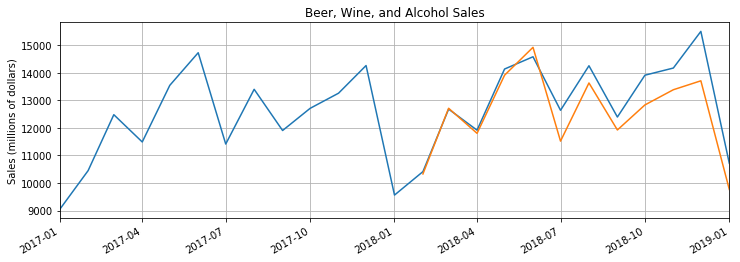

In [49]:
# Plot the end of the graph
fig = plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()

# Select the end of the graph with slice notation:
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_predictions)
plt.show()

In [50]:
epochs = 100

# set model to back to training mode
model.train()

# feature scale the entire dataset
y_norm = scaler.fit_transform(y.reshape(-1, 1))
y_norm = torch.FloatTensor(y_norm).view(-1)
all_data = input_data(y_norm,window_size)

import time
start_time = time.time()

for epoch in range(epochs):
    
    # train on the full set of sequences
    for seq, y_train in all_data:  
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')
    
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch:  1 Loss: 0.02756166
Epoch:  2 Loss: 0.00846552
Epoch:  3 Loss: 0.00962644
Epoch:  4 Loss: 0.00438171
Epoch:  5 Loss: 0.00394531
Epoch:  6 Loss: 0.00255371
Epoch:  7 Loss: 0.00138982
Epoch:  8 Loss: 0.00106311
Epoch:  9 Loss: 0.00144785
Epoch: 10 Loss: 0.00365749
Epoch: 11 Loss: 0.00161971
Epoch: 12 Loss: 0.00232827
Epoch: 13 Loss: 0.00138281
Epoch: 14 Loss: 0.00301511
Epoch: 15 Loss: 0.00113448
Epoch: 16 Loss: 0.00274243
Epoch: 17 Loss: 0.00071171
Epoch: 18 Loss: 0.00000022
Epoch: 19 Loss: 0.00000004
Epoch: 20 Loss: 0.00004279
Epoch: 21 Loss: 0.00189857
Epoch: 22 Loss: 0.00200889
Epoch: 23 Loss: 0.03060116
Epoch: 24 Loss: 0.00048084
Epoch: 25 Loss: 0.00879176
Epoch: 26 Loss: 0.00001295
Epoch: 27 Loss: 0.00098532
Epoch: 28 Loss: 0.00092866
Epoch: 29 Loss: 0.00034121
Epoch: 30 Loss: 0.00000069
Epoch: 31 Loss: 0.00002037
Epoch: 32 Loss: 0.00405942
Epoch: 33 Loss: 0.00067425
Epoch: 34 Loss: 0.00012984
Epoch: 35 Loss: 0.00030099
Epoch: 36 Loss: 0.00012548
Epoch: 37 Loss: 0.00083592
E

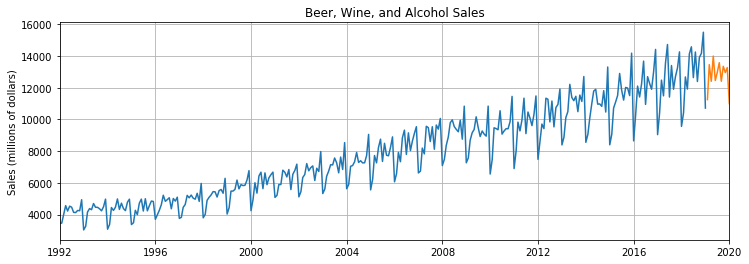

In [51]:
window_size = 12
future = 12
L = len(y)

preds = y_norm[-window_size:].tolist()

model.eval()
for i in range(future):  
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        # Reset the hidden parameters here!
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))  
        preds.append(model(seq).item())

# Inverse-normalize the prediction set
true_predictions = scaler.inverse_transform(np.array(preds).reshape(-1, 1))

# PLOT THE RESULT
# Set a data range for the predicted data.
# Remember that the stop date has to be later than the last predicted value.
x = np.arange('2019-02-01', '2020-02-01', dtype='datetime64[M]').astype('datetime64[D]')

plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'])
plt.plot(x,true_predictions[window_size:])
plt.show()

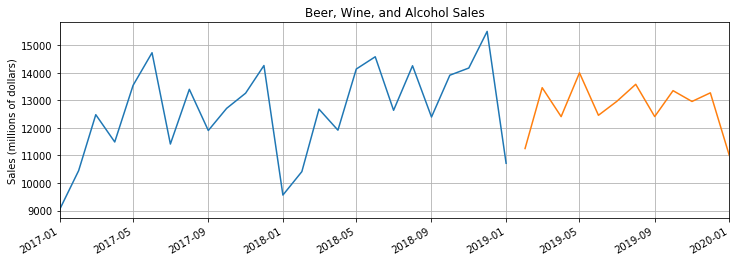

In [52]:
fig = plt.figure(figsize=(12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()
plt.plot(df['S4248SM144NCEN']['2017-01-01':])
plt.plot(x,true_predictions[window_size:])
plt.show()